  # TP - Rendu de monnaie

## Le problème :
Vous avez à votre disposition un nombre illimité de pièces de 2 cts, 5 cts, 10 cts, 50 cts et 1 euro (100 cts). Vous devez rendre une certaine somme (rendu de monnaie). Le problème est le suivant : 

    "Quel est le nombre minimum de pièces qui doivent être utilisées pour rendre la monnaie"
    
La résolution "gloutonne" de ce problème peut être la suivante :
+ On prend la pièce qui a la plus grande valeur (il faut que la valeur de cette pièce soit inférieure ou égale à la somme restant à rendre)
+ On recommence l’opération ci-dessus jusqu’au moment où la somme à rendre est égale à zéro.

### Exercice 1

Appliquer cette méthode à la main pour une somme de 1 Euros 77 (177cts) à rendre. Au final combien faut-il rendre de pièces ?

*********************************************
-

-

-

-

-

-

-
*************************************************












### Exercice 2

Appliquer cette méthode à la somme de 11 centimes. Au final quel resultat obtient-on ?
*********************************************
-

-

-

-

-

-

-
*************************************************


### Exercice 3
Donner une solution pour la somme de 11 centimes.
*********************************************
-

-

-

-
*************************************************

## Mise au point d’un algorithme (récursif)

Soit $X$ la somme à rendre, on notera $nb(X)$ le nombre minimal de pièces nécessaires pour rendre la somme $X$.
On note $p_1;p_2;p_3;\dots;p_n$ les pièces à notre disposition.

Si on est capable de rendre la somme de $X$ cts avec $nb(X)$ pièces, on est alors capable de rendre la somme de $X - p_i$ avec $nb(X - p_i ) + 1$ pièces (avec la valeur de p_i inférieure à X).

On a :
+ Si $X = 0$ alors $nb(X) = 0$
+ Si $X > 0$ alors $nb(X) = nb(X - p_i) + 1$ avec $1 \leq i\leq n$ et $pi \leq X$.

Plus précisément :

Si $X > 0$ alors $nb(X) = \min\limits_{1 \leq i \leq n}(nb(X- p_i)) + 1$ avec $ 1 \leq i \leq n$ et $pi\leq X$.

Le "min" présent dans la formule de récurrence exprime le fait que le nombre de pièces à rendre pour une somme $X -p_i$ doit être le plus petit possible.

*Examinons en détails le processus pour la somme de 11cts à l’aide d’un arbre. On examine tous les cas possibles.*

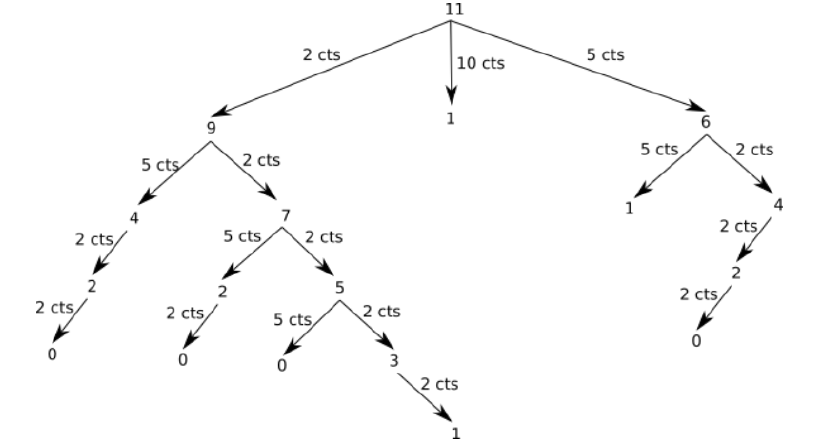

Tous les cas sont "traités" (quand un algorithme "traite" tous les cas possibles, on parle
souvent de méthode de "force brute".
+ Pour certains cas, on se retrouve dans une "impasse" (cas où on termine par un "1")
+ La profondeur minimum de l’arbre (avec une feuille 0) est de 4, la solution au problème est donc 4 (il existe plusieurs parcours : (5,2,2,2), (2,5,2,2)... qui donne à chaque fois 4)

In [2]:
from math import inf # permet d’utiliser l’infini

pieces = (2,5,10,50,100)
def rendu_monnaie_rec(P,X):
    """
    In : list of int, int, (systeme de pieces, monnaie à rendre )
    Out: int, nombre de piéces à rendre
    """
    if X==0:
        return 0
    else:
        mini = inf
    for i in range(len(P)):
        if P[i]<=X:
            nb = 1 + rendu_monnaie_rec(P,X-P[i])
            if nb<mini:
                mini = nb
    return mini


### Exercice 4

Exécuter ce programme et le faire fonctionner pour la somme de 11cts.
Faire évoluer la somme à rendre 12 cts, 15 cts, ....
À partir de quelle somme le programme est-il visiblement lent?
*********************************************
-

-

-

-
*************************************************

Comme vous l’avez sans doute constaté le programme ne permet pas toujours d’obtenir une solution, pourquoi?
Parce que les appels récursifs sont trop nombreux, on dépasse la capacité de la pile.

# La méthode dynamique
En y regardant de plus près, on s’aperçoit que certains calculs se font plusieurs fois (le rendu de 4 cts par exemple dans le schéma ci-dessous)
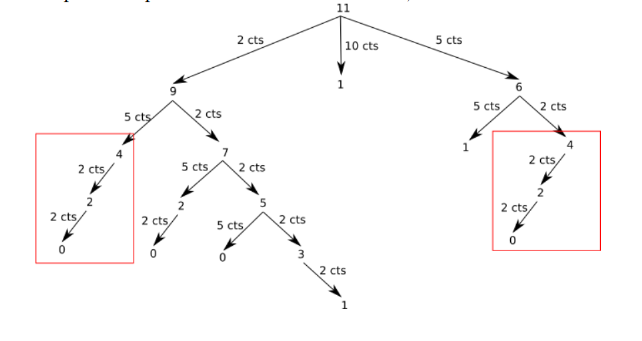

On va pouvoir appliquer la même méthode que pour Fibonacci :
**la programmation dynamique.**
l’algorithme :
```
Données : 
X est un entier (somme à rendre en cts)
P ← pièces
m est un tableau contenant X+1 zéros

FONCTION rendu_monnaie_rec_ mem(P,X,m):
    Si X = 0 alors
        renvoyer 0
    Sinon si m[X] > 0 :
        renvoyer m[X]
    Sinon
        mini ← 1000
        Pour i allant de 0 à len(P) faire
            Si P[i] <= X alors
            nb ← 1 + rendu_monnaie_rec_mem(P,X-P[i],m)
            Si nb < mini alors
                mini ← nb
                m[X] ← mini
        renvoyer mini
```

### Exercice 5
**Implémenter** cet algorithme et vérifier que cette fois-ci, on trouve bien les solutions pour des sommes à rendre comme 177cts ou 289cts.

In [ ]:
#Code


